File name: visualise_latent_vecs

Description: This file uses grids of heatmaps to visualise different vectors, each vector represents a samples place in latent space

In [1]:
import tensorflow as tf 
import keras 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import json

2025-09-06 18:37:21.285401: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-06 18:37:21.338363: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-06 18:37:21.338407: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-06 18:37:21.339783: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-06 18:37:21.347896: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-06 18:37:21.348922: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
with open('../../data/json/VAE_vectors.json', 'r') as f:
    vae_vectors = json.load(f)

with open('../../data/json/CVAE_vectors.json', 'r') as f:
    cvae_vectors = json.load(f)
    
with open('../../data/json/BVAE_vectors.json', 'r') as f:
    bvae_vectors = json.load(f)

with open('../../data/json/BVAE_vectors.json', 'r') as f:
    bvae_vectors = json.load(f)
    
with open('../../data/json/KMeans_labels.json', 'r') as f:
    kmeans_labels = json.load(f)

In [3]:
np.unique(kmeans_labels["labels"])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## VAE heatmap


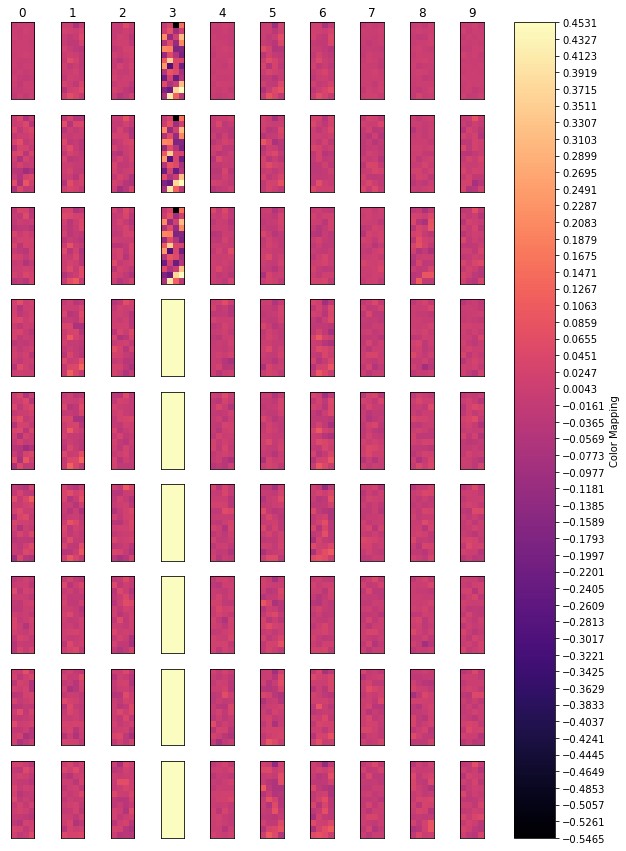

In [4]:
max = np.amax([np.amax(vectors) for vectors in vae_vectors])
min = np.amin([np.amin(vectors) for vectors in vae_vectors])
    
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(9, 10, figsize=(11,15)) 

sm = mpl.cm.ScalarMappable(cmap='magma', norm=mpl.colors.Normalize(min, max))
plt.colorbar(sm, ax=axarr, ticks=np.linspace(min, max), label="Color Mapping")

labels_vecs_zipped = zip(kmeans_labels["labels"], vae_vectors)
labels_vec_diction = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}

for label, vec in labels_vecs_zipped: 
    labels_vec_diction[label].append(vec)

for i, (key, vectors) in enumerate(labels_vec_diction.items()):
    
    avg_vecs = np.mean(vectors, axis=0)
    axarr[0][i].imshow(np.reshape(avg_vecs, (13,4)), vmax=max, vmin=min, cmap='magma')
    axarr[0][i].set_title(f"{key}")
    axarr[0][i].xaxis.set_visible(False)
    axarr[0][i].yaxis.set_visible(False)


for x in range(1,9):
    for y, key in enumerate(labels_vec_diction.keys()):
        if y != 3:
            f = np.reshape(labels_vec_diction[int(key)][np.random.randint(len(labels_vec_diction[int(key)]))], (13,4))
            axarr[x][y].imshow(f, vmax=max, vmin=min, cmap='magma')
            axarr[x][y].xaxis.set_visible(False)
            axarr[x][y].yaxis.set_visible(False)
        else:
            try:
                f = np.reshape(labels_vec_diction[3][x], (13,4))
            except:
                f = np.zeros((13,4))+5

            axarr[x][y].imshow(f, vmax=max, vmin=min, cmap='magma')
            axarr[x][y].xaxis.set_visible(False)
            axarr[x][y].yaxis.set_visible(False)

## BVAE heatmap

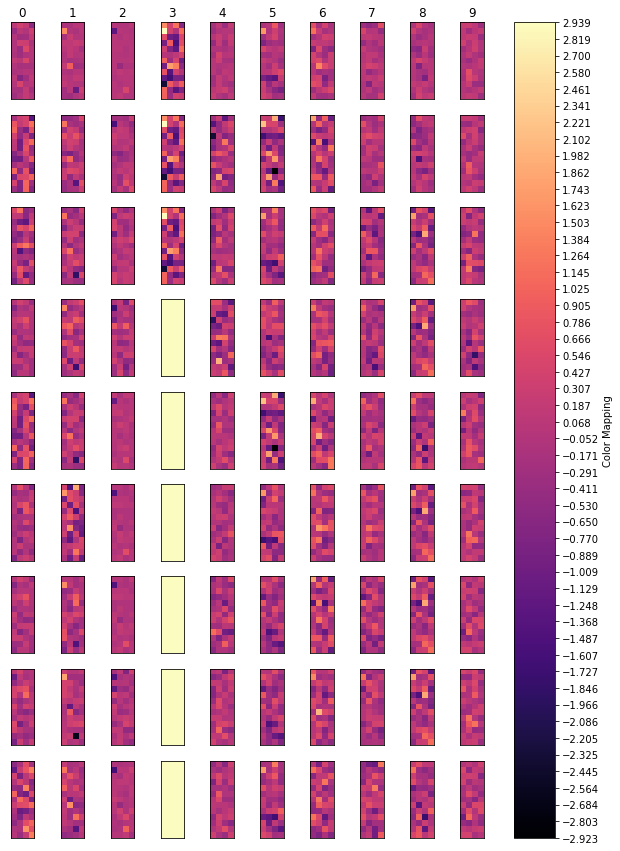

In [5]:
max = np.amax([np.amax(vectors) for vectors in bvae_vectors])
min = np.amin([np.amin(vectors) for vectors in bvae_vectors])
    
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(9, 10, figsize=(11,15)) 

sm = mpl.cm.ScalarMappable(cmap='magma', norm=mpl.colors.Normalize(min, max))
plt.colorbar(sm, ax=axarr, ticks=np.linspace(min, max), label="Color Mapping")

labels_vecs_zipped = zip(kmeans_labels["labels"], bvae_vectors)
labels_vec_diction = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}

for label, vec in labels_vecs_zipped: 
    labels_vec_diction[label].append(vec)

for i, (key, vectors) in enumerate(labels_vec_diction.items()):
    
    avg_vecs = np.mean(vectors, axis=0)
    axarr[0][i].imshow(np.reshape(avg_vecs, (13,4)), vmax=max, vmin=min, cmap='magma')
    axarr[0][i].set_title(f"{key}")
    axarr[0][i].xaxis.set_visible(False)
    axarr[0][i].yaxis.set_visible(False)


for x in range(1,9):
    for y, key in enumerate(labels_vec_diction.keys()):
        if y != 3:
            f = np.reshape(labels_vec_diction[int(key)][np.random.randint(len(labels_vec_diction[int(key)]))], (13,4))
            axarr[x][y].imshow(f, vmax=max, vmin=min, cmap='magma')
            axarr[x][y].xaxis.set_visible(False)
            axarr[x][y].yaxis.set_visible(False)
        else:
            try:
                f = np.reshape(labels_vec_diction[3][x], (13,4))
            except:
                f = np.zeros((13,4))+5

            axarr[x][y].imshow(f, vmax=max, vmin=min, cmap='magma')
            axarr[x][y].xaxis.set_visible(False)
            axarr[x][y].yaxis.set_visible(False)

## CVAE heatmap

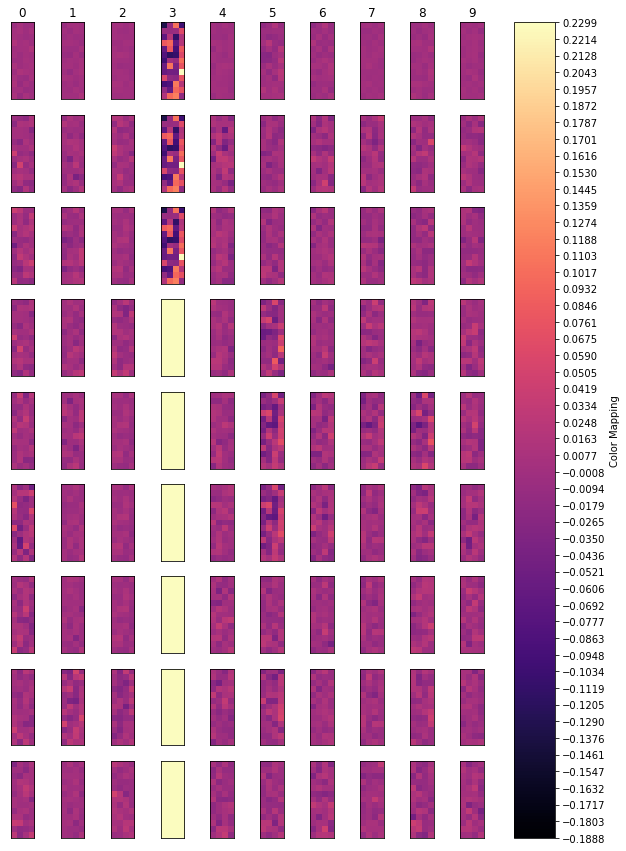

In [6]:
max = np.amax([np.amax(vectors) for vectors in cvae_vectors])
min = np.amin([np.amin(vectors) for vectors in cvae_vectors])
    
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(9, 10, figsize=(11,15)) 

sm = mpl.cm.ScalarMappable(cmap='magma', norm=mpl.colors.Normalize(min, max))
plt.colorbar(sm, ax=axarr, ticks=np.linspace(min, max), label="Color Mapping")

labels_vecs_zipped = zip(kmeans_labels["labels"], cvae_vectors)
labels_vec_diction = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}

for label, vec in labels_vecs_zipped: 
    labels_vec_diction[label].append(vec)

for i, (key, vectors) in enumerate(labels_vec_diction.items()):
    
    avg_vecs = np.mean(vectors, axis=0)
    axarr[0][i].imshow(np.reshape(avg_vecs, (13,4)), vmax=max, vmin=min, cmap='magma')
    axarr[0][i].set_title(f"{key}")
    axarr[0][i].xaxis.set_visible(False)
    axarr[0][i].yaxis.set_visible(False)


for x in range(1,9):
    for y, key in enumerate(labels_vec_diction.keys()):
        if y != 3:
            f = np.reshape(labels_vec_diction[int(key)][np.random.randint(len(labels_vec_diction[int(key)]))], (13,4))
            axarr[x][y].imshow(f, vmax=max, vmin=min, cmap='magma')
            axarr[x][y].xaxis.set_visible(False)
            axarr[x][y].yaxis.set_visible(False)
        else:
            try:
                f = np.reshape(labels_vec_diction[3][x], (13,4))
            except:
                f = np.zeros((13,4))+5

            axarr[x][y].imshow(f, vmax=max, vmin=min, cmap='magma')
            axarr[x][y].xaxis.set_visible(False)
            axarr[x][y].yaxis.set_visible(False)